## Sharks_Part2_Florida

In [8]:
ls

DIARY.md               Sharks_Florida.ipynb   sharks_florida2.ipynb
GSAF5.xls              daytime3.pdf


In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
import re
import matplotlib.pyplot as plt

In [10]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
#matplotlib.rcParams['svg.fonttype'] = 42

In [11]:
sharks = pd.read_excel("GSAF5.xls",  na_values=["UNKNOWN"])

In [12]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [13]:
sharks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2017.07.09,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,...,"Bull shark, 4' to 5'","Miami-Beach Patch, 7/9/2017",2017.07.09-Lanza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.09,2017.07.09,6105.0,NaN,NaN
1,2017.07.07,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,...,"White shark, 2.5 m","Dispatch Live, 7/7/2027",2017.07.07-Stein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.07,2017.07.07,6104.0,NaN,NaN


In [14]:
sharks.drop(sharks.columns[[0, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1, inplace=True)

In [15]:
sharks['Area'].value_counts().head(2)

Florida            1017
New South Wales     476
Name: Area, dtype: int64

In [16]:
sharks['Location'].value_counts()

New Smyrna Beach, Volusia County                                       162
Daytona Beach, Volusia County                                           29
Ponce Inlet, Volusia County                                             18
Melbourne Beach, Brevard County                                         18
Myrtle Beach, Horry County                                              17
Durban                                                                  15
Isle of Palms, Charleston County                                        14
Boa Viagem, Recife                                                      13
Cocoa Beach, Brevard County                                             12
Ponce Inlet, New Smyrna Beach, Volusia County                           12
Ahvaz, on the Karun River                                               11
Palm Beach, Palm Beach County                                           11
Mossel Bay                                                              11
Ormond Beach, Volusia Cou

In [17]:
# just found out that Ponce Inlet is the same as New Smyrna Beach. Oh mei, what a difficult dataset
sharks['Location'].replace({'Ponce Inlet, Volusia County': 'New Smyrna Beach, Volusia County', 'Ponce Inlet, New Smyrna Beach, Volusia County': 'New Smyrna Beach, Volusia County', 'New Smyrna Beach': 'New Smyrna Beach, Volusia County'}, inplace=True)

In [18]:
sharks['Location'].value_counts()

New Smyrna Beach, Volusia County                                       196
Daytona Beach, Volusia County                                           29
Melbourne Beach, Brevard County                                         18
Myrtle Beach, Horry County                                              17
Durban                                                                  15
Isle of Palms, Charleston County                                        14
Boa Viagem, Recife                                                      13
Cocoa Beach, Brevard County                                             12
Ahvaz, on the Karun River                                               11
Ormond Beach, Volusia County                                            11
Mossel Bay                                                              11
Palm Beach, Palm Beach County                                           11
Sydney Harbor                                                           10
Singer Island, Riviera Be

In [19]:
#sharks.dropna(subset=["Area"], inplace=True)

In [20]:
#sharks.dropna(subset=["Location"], inplace=True)

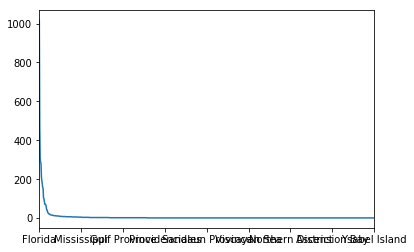

In [21]:
sharks['Area'].value_counts().plot()

In [22]:
sharks_Florida = sharks[sharks["Area"] == "Florida"]

In [23]:
sharks_Florida.dtypes

Date            object
Year           float64
Type            object
Country         object
Area            object
Location        object
Activity        object
Name            object
Sex             object
Age             object
Injury          object
Fatal (Y/N)     object
Time            object
Species         object
dtype: object

In [24]:
shark_values = sharks_Florida['Location'].value_counts().to_frame()
# sharks[(sharks["Year"]>1970) & (attack["Year"]<2017)]
# .to_frame() will turn your series into a dataframe

In [25]:
type(sharks_Florida['Location'].value_counts())

pandas.core.series.Series

In [26]:
sharks_Florida.head(2)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'"
5,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,NaN,1 to 2-inch laceration behind knee,N,Morning,NaN


In [27]:
sharks_Florida['Location']

0                       Haulover Beach, Miami-Dade County
5                        Singer Island, Palm Beach County
12                       New Smyrna Beach, Volusia County
14        Middle Sambo Reef off Boca Chica, Monroe County
17                                            Off Jupiter
28                                                    NaN
31                          Daytona Beach, Volusia County
34                 Hanna Park, Jacksonville, Duval County
35                                          St. Augustine
37                           Ormond Beach, Volusia County
38                        Melbourne Beach, Brevard County
39                        Melbourne Beach, Brevard County
40                                Daytona, Volusia County
41                       New Smyrna Beach, Volusia County
43                                Destin, Okaloosa County
44                       New Smyrna Beach, Volusia County
52                        Melbourne Beach, Brevard County
57            

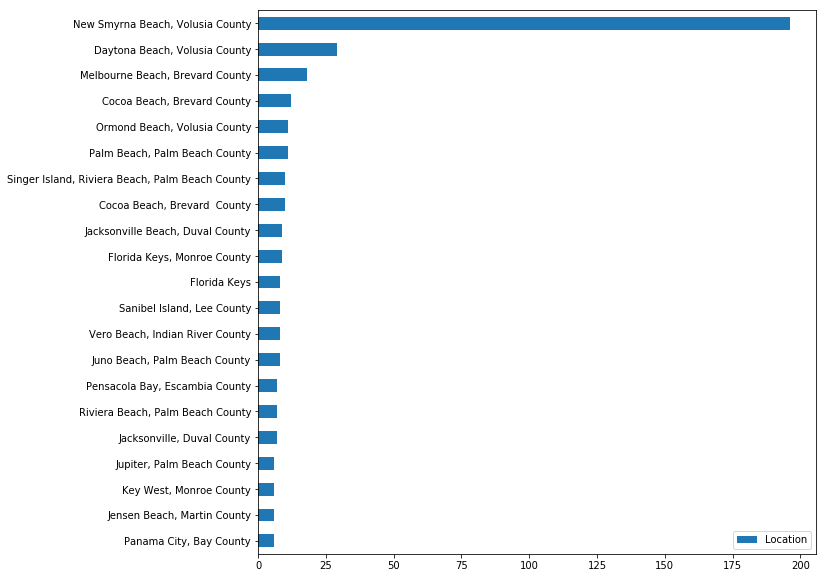

In [28]:
shark_values.reset_index()
shark_values[shark_values['Location']>5].sort_values(by="Location",ascending=True).plot(kind="barh", figsize=(10,10))
plt.savefig("beach_neu.pdf")

In [29]:
sharks_Florida['Location'].value_counts().head(10)

New Smyrna Beach, Volusia County                   196
Daytona Beach, Volusia County                       29
Melbourne Beach, Brevard County                     18
Cocoa Beach, Brevard County                         12
Ormond Beach, Volusia County                        11
Palm Beach, Palm Beach County                       11
Singer Island, Riviera Beach, Palm Beach County     10
Cocoa Beach, Brevard  County                        10
Florida Keys, Monroe County                          9
Jacksonville Beach, Duval County                     9
Name: Location, dtype: int64

In [30]:
sharks_smyrna = sharks_Florida[sharks_Florida['Location'] == "New Smyrna Beach, Volusia County"]

In [31]:
sharks_smyrna.shape

(196, 14)

In [32]:
sharks_smyrna.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
12,10-Jun-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,NaN
41,05-Apr-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,Melanie Lawson,F,51,"Thigh nipped, minor injury",N,13h00,NaN
44,27-Mar-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Robert Nesbit,M,58,Minor injury to left foot,N,10h00,NaN
69,11-Dec-2016,2016.0,Invalid,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Shane Garthwait,M,19,Cuts to right ankle & foot,N,Afternoon,NaN
84,02-Oct-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,21,Cuts to dorsal surface of left foot,N,11h30,NaN


In [33]:
#sharks_smyrna['Date'].value_counts().plot(kind='barh')

In [34]:
import re

In [35]:
sharks_smyrna['Month'] = sharks_smyrna['Date'].astype(str).str.extract('-(\w*)-')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
#sharks_smyrna['Month'].head()

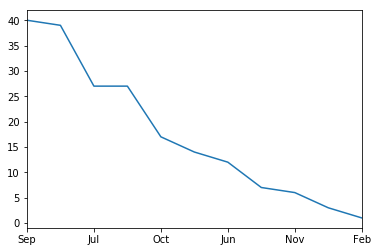

In [37]:
sharks_smyrna['Month'].value_counts().plot()

In [38]:
# make a datetime column
sharks_smyrna["happened_at"] = pd.to_datetime(sharks_smyrna["Date"], format="%d-%b-%Y", errors="coerce")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
sharks_smyrna.happened_at.head()

12   2017-06-10
41   2017-04-05
44   2017-03-27
69   2016-12-11
84   2016-10-02
Name: happened_at, dtype: datetime64[ns]

In [40]:
sharks_smyrna.happened_at.dt.month.head()

12     6.0
41     4.0
44     3.0
69    12.0
84    10.0
Name: happened_at, dtype: float64

In [41]:
# there are 40 incidents in september, why don't they show up in the graph?
sharks_smyrna_sep = sharks_smyrna[sharks_smyrna['Month'] == 'Sep']

In [43]:
#sharks_smyrna['happened_at'].resample("M", on="happened_at").size().plot()

In [44]:
sharks_smyrna_sep.count()

Date           40
Year           40
Type           40
Country        40
Area           40
Location       40
Activity       40
Name           40
Sex            38
Age            38
Injury         40
Fatal (Y/N)    40
Time           36
Species        16
Month          40
happened_at    39
dtype: int64

In [47]:
sharks_smyrna['Date'].head()

12    10-Jun-2017
41    05-Apr-2017
44    27-Mar-2017
69    11-Dec-2016
84    02-Oct-2016
Name: Date, dtype: object

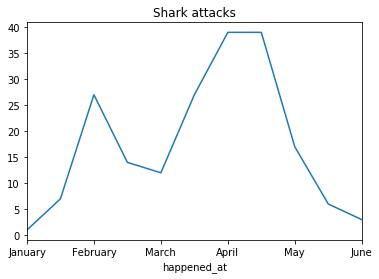

In [46]:
ax = sharks_smyrna.groupby(by=sharks_smyrna.happened_at.dt.month).size().plot()
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'])
ax.set_title("Shark attacks")
#plt.savefig("Season.pdf")
#plt.savefig("Seson.svg")

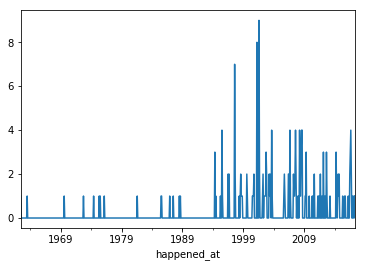

In [48]:
sharks_smyrna.resample("M", on="happened_at").size().plot()

In [ ]:
# %%%% to make pie charts we might need per centage: .....value_counts(normalize=True)
#sharks_smyrna.groupby(by=sharks_smyrna.happened_at.dt.month).value_counts(normalize=True)

In [49]:
sharks_smyrna.head(2)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Month,happened_at
12,10-Jun-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,NaN,Jun,2017-06-10
41,05-Apr-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,Melanie Lawson,F,51,"Thigh nipped, minor injury",N,13h00,NaN,Apr,2017-04-05


In [50]:
swimming = sharks_smyrna[(sharks_smyrna["Activity"] == "Swimming") & (sharks_smyrna['happened_at'])]
surfing = sharks_smyrna[(sharks_smyrna["Activity"] == "Surfing") & (sharks_smyrna['happened_at'])]

In [51]:
swimming.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Month,happened_at
41,05-Apr-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,Melanie Lawson,F,51,"Thigh nipped, minor injury",N,13h00,NaN,Apr,2017-04-05
1218,12-Aug-2007,2007.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,female,F,15,"Minor injury, small lacerations to right foot",N,17h35,,Aug,2007-08-12
1306,02-Sep-2006,2006.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,male,M,12 or 13,Arm bitten,N,17h55,NaN,Sep,2006-09-02
1717,20-Jun-2002,2002.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,female,F,11,Small lacerations on right lower leg,N,14h25,NaN,Jun,2002-06-20
1888,31-Aug-2000,2000.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,Rickey Johnson,M,47,Punctures & lacerations on right foot,N,12h35,A 2' shark was seen in the area by witnesses,Aug,2000-08-31


In [52]:
swimming.dtypes

Date                   object
Year                  float64
Type                   object
Country                object
Area                   object
Location               object
Activity               object
Name                   object
Sex                    object
Age                    object
Injury                 object
Fatal (Y/N)            object
Time                   object
Species                object
Month                  object
happened_at    datetime64[ns]
dtype: object

In [53]:
#swimming.resample('H')['Country'].plot()

In [54]:
#sharks_smyrna_2016 = sharks_smyrna[sharks_smyrna['Year'] == 2016]

In [55]:
#sharks_smyrna_2016['Date'].value_counts().plot()
#.to_datetime

In [56]:
#sharks_smyrna_2016['Date']

In [57]:
#sharks_smyrna_2016['Date'] = pd.to_datetime(sharks_smyrna_2016.Date, format="%d-%b-%Y")

In [58]:
sharks.dropna(subset=["Date"], inplace=True)

In [59]:
sharks.dropna(subset=["Time"], inplace=True)

In [60]:
sharks['Time'].head()

0      15h30
1      15h00
3      19h30
5    Morning
7      10h00
Name: Time, dtype: object

In [61]:
sharks['Time']
sharks.Time.replace('h', ':',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

Afternoon    181
11:00        126
Name: Time, dtype: int64

In [62]:
sharks.Time.replace('Morning', '09:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

Afternoon    181
09:00        161
Name: Time, dtype: int64

In [63]:
sharks.Time.replace('Afternoon', '16:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [64]:
sharks.Time.replace('Nig:t', '01:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [65]:
sharks.Time.replace('"After lunc:"', '14:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [66]:
sharks.Time.replace('"Evening"', '19:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [67]:
sharks.Time.replace('Evening', '19:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [68]:
sharks.Time.replace('Late afternoon', '17:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [69]:
sharks.Time.replace('>', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [70]:
sharks.Time.replace('<', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [71]:
sharks.Time.replace('"s:ortly before dusk"', '19:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [72]:
sharks.Time.replace('"Late nig:t"', '23:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [73]:
sharks.Time.replace('Late nig:t', '23:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [74]:
sharks.Time.replace('Late', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [75]:
sharks.Time.replace('After Dusk', '22:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [76]:
sharks.Time.replace('S:ortly before', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [77]:
sharks.Time.replace('Mid-morning', '10:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [78]:
sharks.Time.replace('Prior to', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [79]:
sharks.Time.replace('Between', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [80]:
sharks.Time.replace('dusk', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [81]:
sharks.Time.replace('Sometime between', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [82]:
sharks.Time.replace('FATAL  (Wire netting installed at local beac:es after t:is incident.)', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [83]:
sharks.Time.replace('FATAL  (Wire netting installed at local beac:es after t:is incident.)', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [84]:
sharks.Time.replace('"FATAL (Wire netting installed at local beac:es after t:is incident.)"', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [85]:
sharks.Time.replace('2 :rs before sunset', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [86]:
sharks.Time.replace('30 minutes after 1992.07.08.a', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [87]:
sharks.Time.replace('Lunc:time', '12:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [88]:
sharks.Time.replace('(Sunset)', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [89]:
sharks.Time.replace('X', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [90]:
sharks.Time.replace(' (12:00)', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [91]:
sharks.Time.replace('After', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [92]:
sharks.Time.replace(' "dark"', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [93]:
sharks.Time.replace(' - 04:00', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [94]:
sharks.Time.replace(' to 14:00', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [95]:
sharks.Time.replace('(12:00)', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    161
Name: Time, dtype: int64

In [96]:
sharks.Time.replace('Early ', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [97]:
sharks.Time.replace('"01:00"', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [98]:
sharks.Time.replace(' 11:00 & ', '11:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [99]:
sharks.Time.replace(' or 14:00', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [100]:
sharks.Time.replace(' 11:00 &', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [101]:
sharks.Time.replace(' 11:00 &', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [102]:
sharks.Time.replace(' / 11:00', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [103]:
sharks.Time.replace(' 06:00 & 07:20', '06:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    279
09:00    162
Name: Time, dtype: int64

In [104]:
sharks.Time.replace(' 16:00', '16:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    162
Name: Time, dtype: int64

In [105]:
sharks.Time.replace(' ()', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [106]:
sharks.Time.replace('Possiblysameincidentas2000.08.21', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [107]:
sharks.Time.replace('Justbeforedawn', '18:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [108]:
sharks.Time.replace('06j00', '06:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [109]:
sharks.Time.replace('-11:15', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [110]:
sharks.Time.replace('midnig:t', '00:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [111]:
sharks.Time.replace('Midday.', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [112]:
sharks.Time.replace('&08:oo', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [113]:
sharks.Time.replace('Justafter', '13:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [114]:
sharks.Time.replace('FATAL\(Wirenettinginstalledatlocalbeac:esaftert:isincident.\)', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [115]:
sharks.Time.replace('\(\)', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [116]:
sharks.Time.replace('to21:30', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [117]:
sharks.Time.replace('j', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [118]:
sharks.Time.replace('Noon', '12:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [119]:
sharks.Time.replace('/11:30', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [120]:
sharks.Time.replace('2:oursafterOpperman', '',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [121]:
sharks.Time.replace('"Justbefore11:00"', '11:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)
#sharks["Time"] = pd.to_datetime(sharks.Time, exact=True, format="%H:%M", errors="coerce")


16:00    280
09:00    163
Name: Time, dtype: int64

In [122]:
sharks.Time.replace('Afternoon', '15:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [123]:
sharks.Time.replace('11:115', '11:15',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [124]:
sharks.Time.replace('11h115', '11:15',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [125]:
sharks.Time.replace('Morning', '09:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [126]:
sharks.Time.replace('Late afternoon', '17:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [127]:
sharks.Time.replace('Just before morning', '05:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [128]:
sharks.Time.replace('Just before noon', '11:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [129]:
sharks.Time.replace('Mid-morning', '11:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [130]:
sharks.Time.replace('8:04 pm', '20:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [131]:
sharks.Time.replace('Evening', '20:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [132]:
sharks.Time.replace('P.M.', '15:00',inplace=True, regex=True)
sharks['Time'].value_counts().head(2)

16:00    280
09:00    163
Name: Time, dtype: int64

In [133]:
sharks[sharks['Time'].isnull()].shape

(0, 14)

In [134]:
pd.set_option('display.max_rows', 2600)

In [135]:
sharks["Time"] = pd.to_datetime(sharks.Time, exact=True, format="%H:%M", errors="coerce")

In [136]:
sharks['Time'].head(2)

0   1900-01-01 15:30:00
1   1900-01-01 15:00:00
Name: Time, dtype: datetime64[ns]

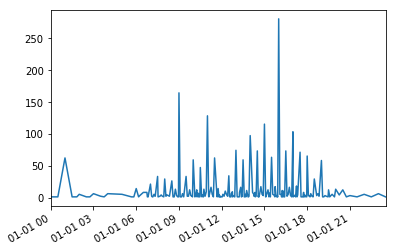

In [137]:
sharks['Time'].value_counts().plot() # fragen!!!!

In [ ]:
#shark_time = sharks.groupby('Date')['Time']#.count().sort_values().to_frame()

In [ ]:
#sharks_smyrna["what_time"] = pd.to_datetime(sharks_smyrna["Time"], format="%H:%M", errors="coerce")

In [ ]:
#sharks_Florida = sharks[['Location'] == "New Smyrna Beach, Volusia County"]
#sharks_Forida
#interested = sharks_Florida[sharks_Florida.Activity.isin(['Swimming', 'Surfing'])]
#interested.groupby('Activity')['sharks_Florida'].value_counts()
#interested.groupby('Activity')['sharks_Florida'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,5))


In [138]:
sharks_smyrna_time = sharks[sharks['Location'] == "New Smyrna Beach, Volusia County"]
sharks_smyrna_time

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
12,10-Jun-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,1900-01-01 10:00:00,NaN
41,05-Apr-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,Melanie Lawson,F,51,"Thigh nipped, minor injury",N,1900-01-01 13:00:00,NaN
44,27-Mar-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Robert Nesbit,M,58,Minor injury to left foot,N,1900-01-01 10:00:00,NaN
69,11-Dec-2016,2016.0,Invalid,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Shane Garthwait,M,19,Cuts to right ankle & foot,N,1900-01-01 16:00:00,NaN
84,02-Oct-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,21,Cuts to dorsal surface of left foot,N,1900-01-01 11:30:00,NaN
85,01-Oct-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfng,male,M,32,Minor injuries,N,1900-01-01 17:30:00,NaN
87,18-Sep-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,1900-01-01 13:00:00,NaN
88,18-Sep-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,1900-01-01 11:00:00,NaN
89,18-Sep-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,1900-01-01 10:43:00,NaN
102,29-Aug-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Sam Cumiskey,M,25,Lacerations to right foot,N,1900-01-01 15:00:00,"Bull shark, 6'"


In [139]:
sharks_smyrna_time.index = sharks_smyrna_time.Time

In [140]:
sharks_smyrna_time.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
Time,,,,,,,,,,,,,,
1900-01-01 10:00:00,10-Jun-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,1900-01-01 10:00:00,NaN
1900-01-01 13:00:00,05-Apr-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,Melanie Lawson,F,51,"Thigh nipped, minor injury",N,1900-01-01 13:00:00,NaN
1900-01-01 10:00:00,27-Mar-2017,2017.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Robert Nesbit,M,58,Minor injury to left foot,N,1900-01-01 10:00:00,NaN
1900-01-01 16:00:00,11-Dec-2016,2016.0,Invalid,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Shane Garthwait,M,19,Cuts to right ankle & foot,N,1900-01-01 16:00:00,NaN
1900-01-01 11:30:00,02-Oct-2016,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,21,Cuts to dorsal surface of left foot,N,1900-01-01 11:30:00,NaN


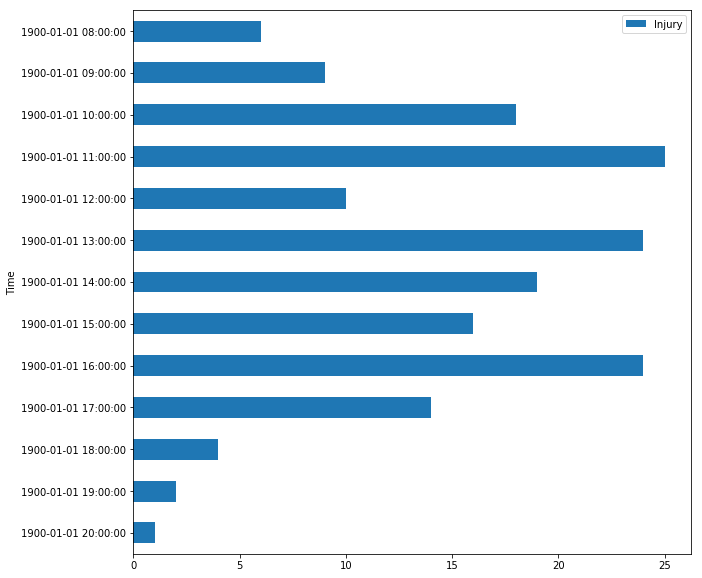

In [141]:
sharks_smyrna_time.resample("H").count().sort_index(ascending=False).plot(kind='barh', y='Injury', figsize=(10,10))
#plt.savefig("daytime2.pdf")

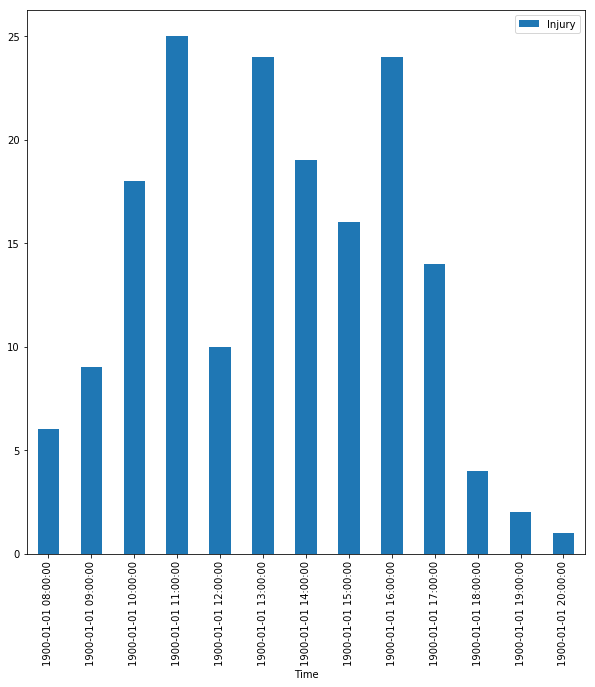

In [142]:
sharks_smyrna_time.resample("H").count().sort_index(ascending=True).plot(kind='bar', y='Injury', figsize=(10,10))
#plt.savefig("daytime3.pdf")

In [143]:
sharks_smyrna['Time'].value_counts(normalize=True).head(2)

12h00    0.038462
14h00    0.038462
Name: Time, dtype: float64

In [144]:
sharks_smyrna_time.resample("H").count()['Date'].sum()

172

In [145]:
sharks_smyrna_time.resample("H").count()['Date'] / sharks_smyrna_time.resample("H").count()['Date'].sum()

Time
1900-01-01 08:00:00    0.034884
1900-01-01 09:00:00    0.052326
1900-01-01 10:00:00    0.104651
1900-01-01 11:00:00    0.145349
1900-01-01 12:00:00    0.058140
1900-01-01 13:00:00    0.139535
1900-01-01 14:00:00    0.110465
1900-01-01 15:00:00    0.093023
1900-01-01 16:00:00    0.139535
1900-01-01 17:00:00    0.081395
1900-01-01 18:00:00    0.023256
1900-01-01 19:00:00    0.011628
1900-01-01 20:00:00    0.005814
Name: Date, dtype: float64

In [146]:
sharks_smyrna_time.resample("H").count()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
Time,,,,,,,,,,,,,,
1900-01-01 08:00:00,6,6,6,6,6,6,6,6,6,6,6,6,6,4
1900-01-01 09:00:00,9,9,9,9,9,9,9,9,9,9,9,9,9,4
1900-01-01 10:00:00,18,18,18,18,18,18,17,18,18,18,18,18,18,10
1900-01-01 11:00:00,25,25,25,25,25,25,24,25,24,24,25,25,25,12
1900-01-01 12:00:00,10,10,10,10,10,10,10,10,10,10,10,10,10,6
1900-01-01 13:00:00,24,24,24,24,24,24,23,24,24,24,24,24,24,10
1900-01-01 14:00:00,19,19,19,19,19,19,18,19,18,18,19,19,19,6
1900-01-01 15:00:00,16,16,16,16,16,16,16,16,16,16,16,16,16,8
1900-01-01 16:00:00,24,24,24,24,24,24,24,24,24,23,24,24,24,11


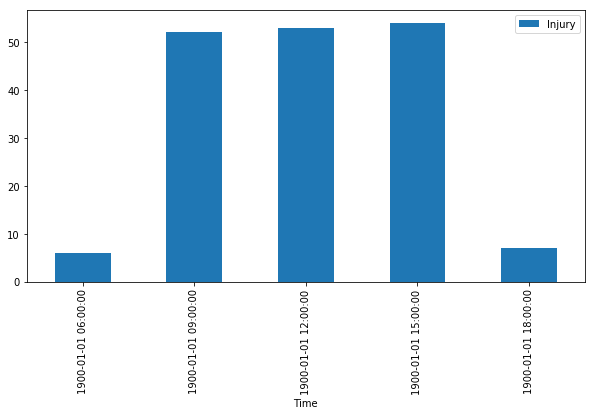

In [147]:
sharks_smyrna_time.resample("3H").count().plot(kind='bar', y='Injury', figsize=(10,5))

In [160]:
sharks_smyrna_2016 = sharks_smyrna[(sharks_smyrna["Year"] == 2016)]

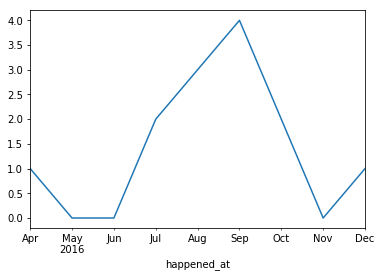

In [161]:
sharks_smyrna_2016.resample("M", on="happened_at").size().plot()

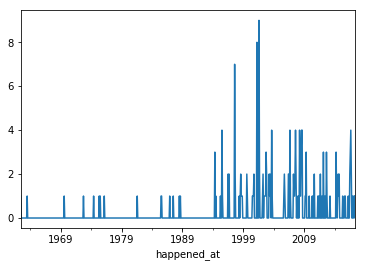

In [148]:
sharks_smyrna.resample("M", on="happened_at").size().plot()

In [156]:
sharks_smyrna_2016.count()

Date           13
Year           13
Type           13
Country        13
Area           13
Location       13
Activity       12
Name           13
Sex            13
Age            13
Injury         13
Fatal (Y/N)    13
Time           11
Species         2
Month          13
happened_at    13
dtype: int64